In [1]:
import pandas as pd
import skimage
import numpy as np
import scipy
import os
import glob
from keras.applications.imagenet_utils import decode_predictions
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"
%matplotlib inline

Using TensorFlow backend.


In [2]:
CSV_FOLDER = "/mnt/dados/LARS_2019/"
CM_EXT = "_cm.csv"
STATS_EXT = "_stats.csv"
FIGURE_FOLDER = "/mnt/dados/LARS_2019/cm/"

In [3]:
if not os.path.exists(FIGURE_FOLDER):
    os.makedirs(FIGURE_FOLDER)

In [17]:
model_list = [
#     'densenet',
#     'inception_v3',
#     'inception_resnet',
#     'mobilenet.',
#     'mobilenet_v2',
    'NASNetLarg',
    'NASNetMobi',
#     'ResNet50',
#     'VGG16',
#     'Xception',
]


In [5]:
# find confusion matrix files
csv_list = glob.glob(CSV_FOLDER + "*" + CM_EXT)
csv_list.sort()
print("Found ", len(csv_list), " files")

Found  151  files


NASNetLarg
14 ['/mnt/dados/LARS_2019/___nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__compression_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__gamma12_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__gamma14_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__gamma18_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__gamma2_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__gamma4_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__gamma8_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__gauss_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__poisson_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__s&p_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__saturate_p25_nasnet.NASNetLarge(i_cm.csv', '/mnt/dados/LARS_2019/__speckle_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__underexpose_p25_nasnet.NASNetLarge(i_cm.csv']
/mnt/dados/LARS_2019/___nasnet.NASNetLarg_cm.csv


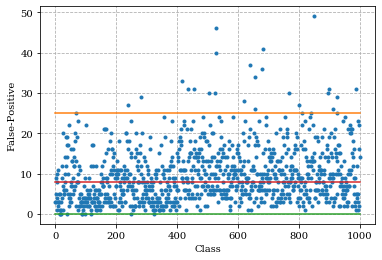

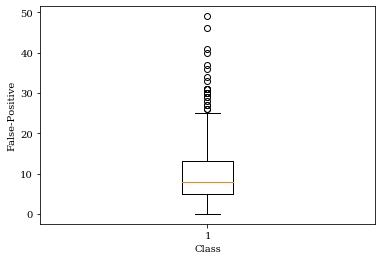

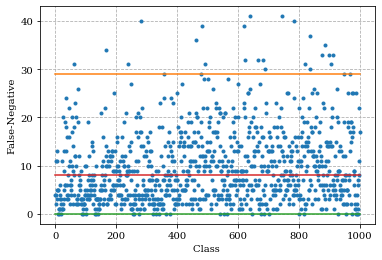

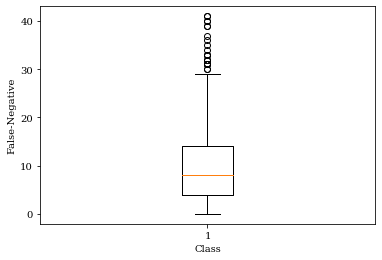

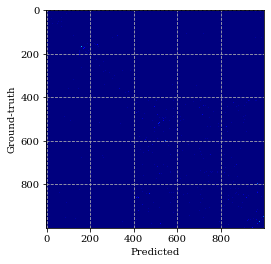

/mnt/dados/LARS_2019/__compression_nasnet.NASNetLarg_cm.csv


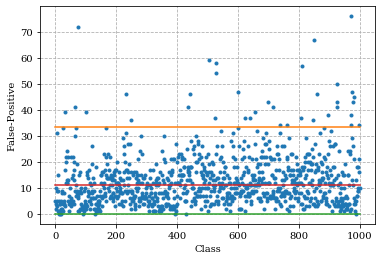

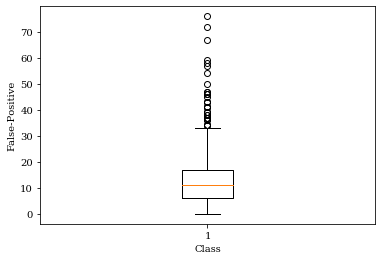

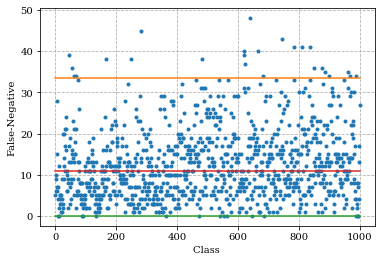

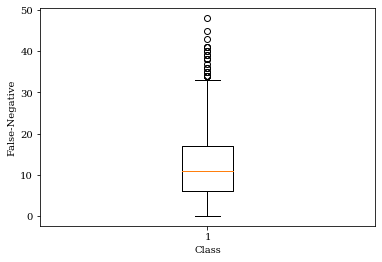

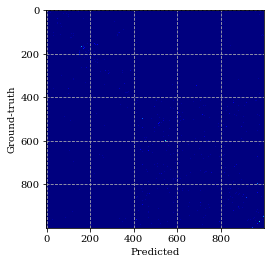

/mnt/dados/LARS_2019/__gamma12_nasnet.NASNetLarg_cm.csv


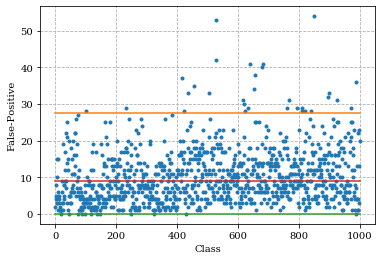

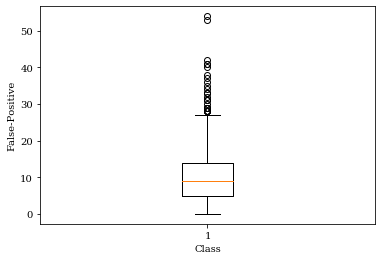

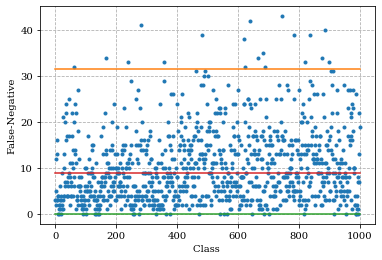

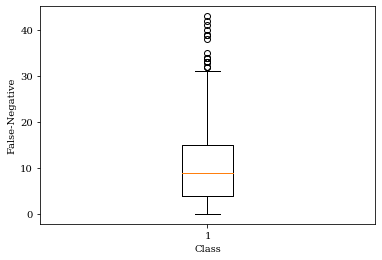

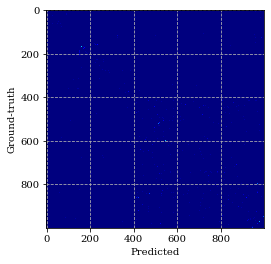

/mnt/dados/LARS_2019/__gamma14_nasnet.NASNetLarg_cm.csv


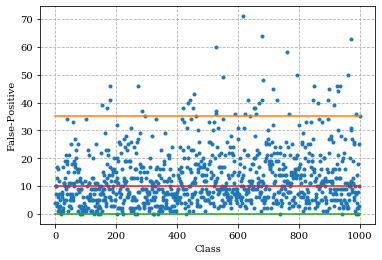

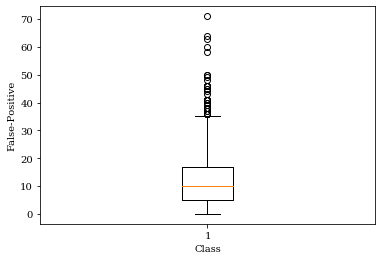

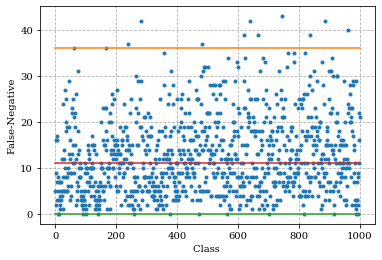

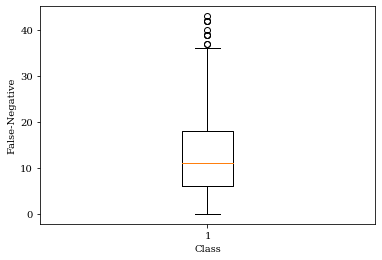

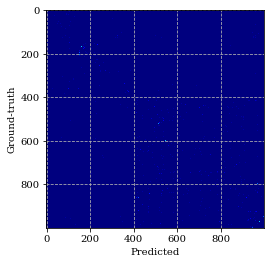

/mnt/dados/LARS_2019/__gamma18_nasnet.NASNetLarg_cm.csv


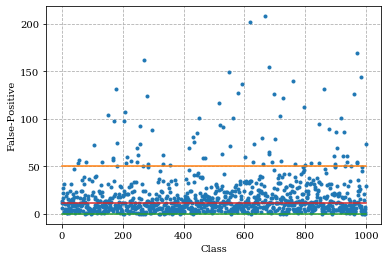

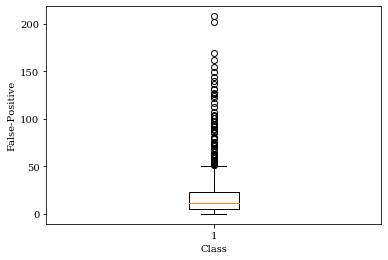

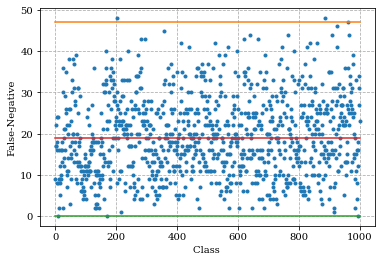

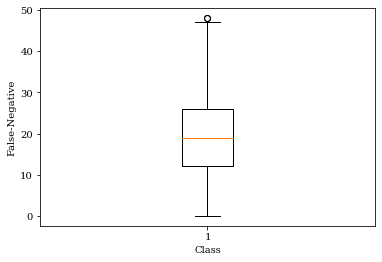

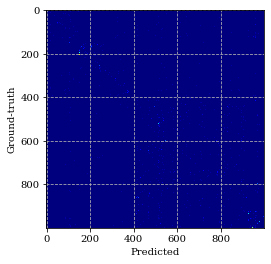

/mnt/dados/LARS_2019/__gamma2_nasnet.NASNetLarg_cm.csv


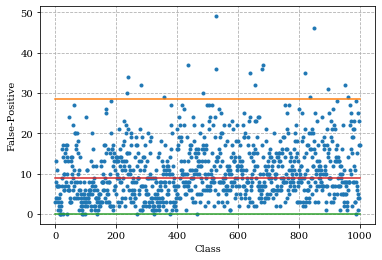

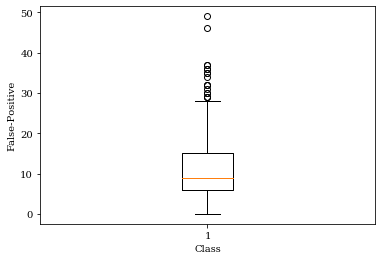

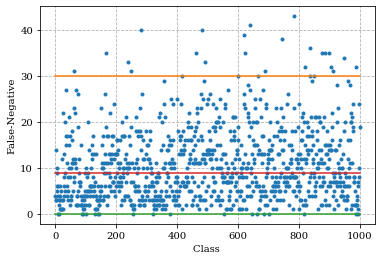

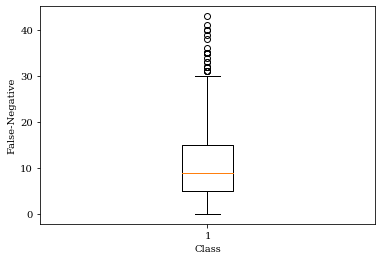

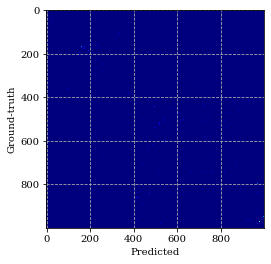

/mnt/dados/LARS_2019/__gamma4_nasnet.NASNetLarg_cm.csv


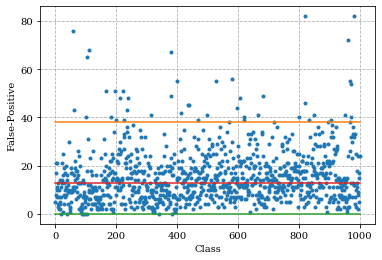

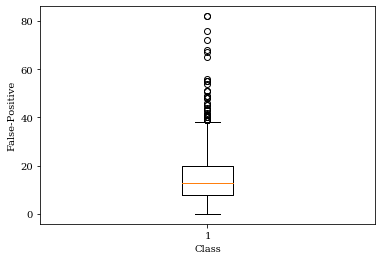

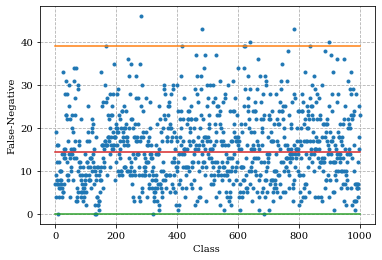

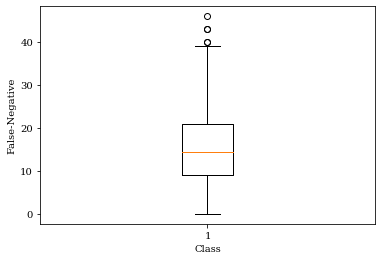

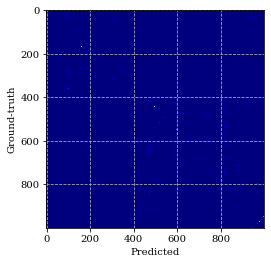

/mnt/dados/LARS_2019/__gamma8_nasnet.NASNetLarg_cm.csv


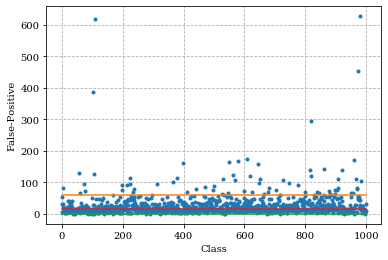

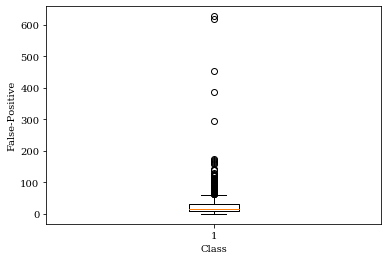

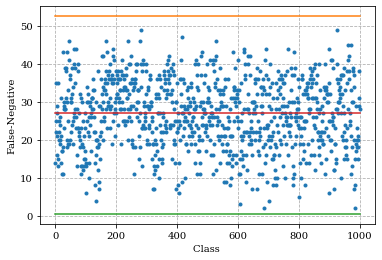

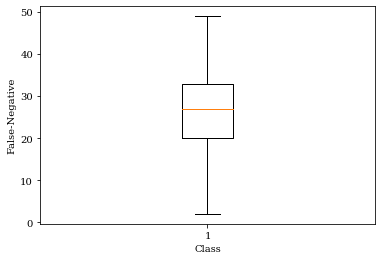

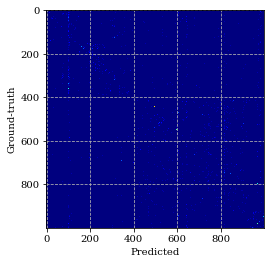

/mnt/dados/LARS_2019/__gauss_nasnet.NASNetLarg_cm.csv


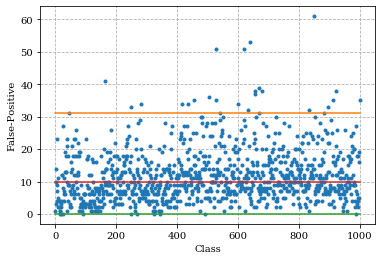

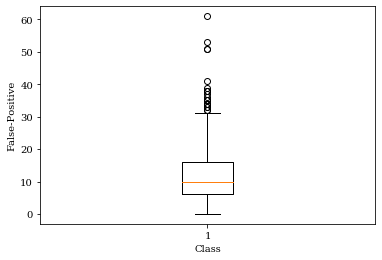

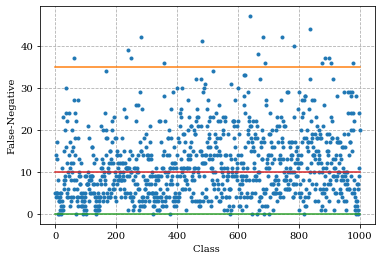

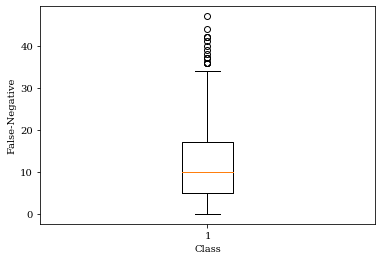

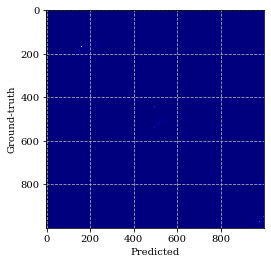

/mnt/dados/LARS_2019/__poisson_nasnet.NASNetLarg_cm.csv


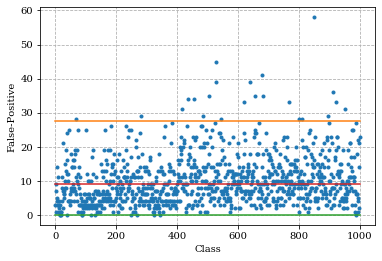

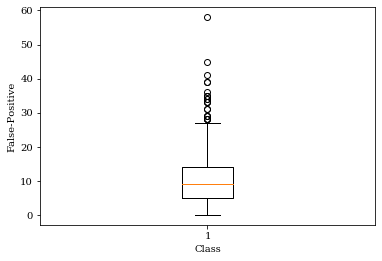

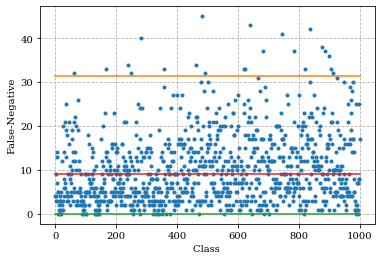

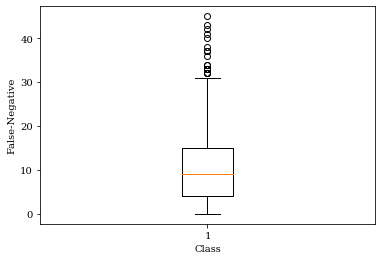

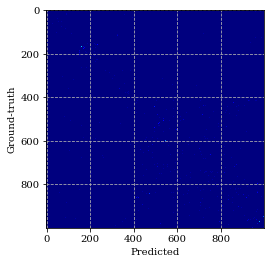

/mnt/dados/LARS_2019/__s&p_nasnet.NASNetLarg_cm.csv


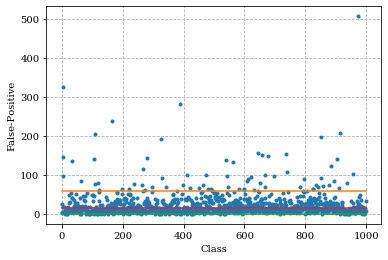

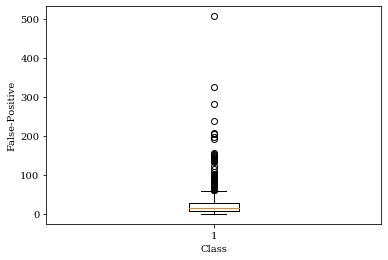

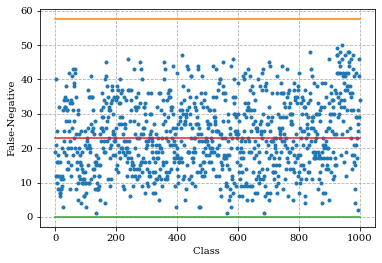

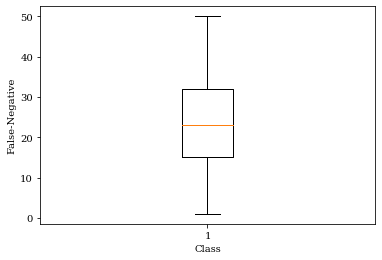

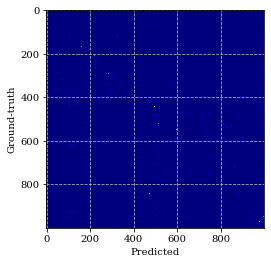

/mnt/dados/LARS_2019/__saturate_p25_nasnet.NASNetLarge(i_cm.csv


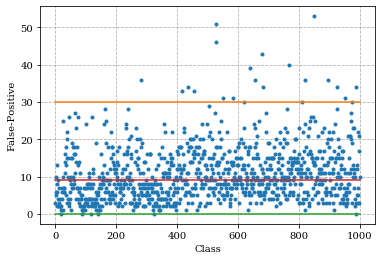

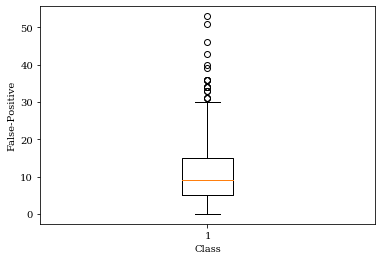

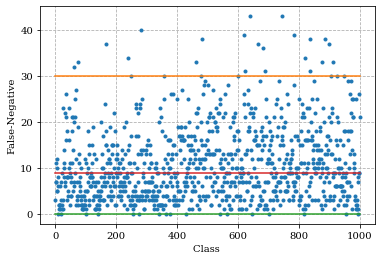

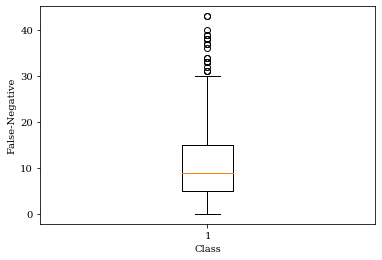

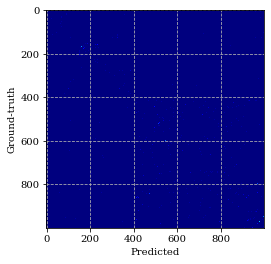

/mnt/dados/LARS_2019/__speckle_nasnet.NASNetLarg_cm.csv


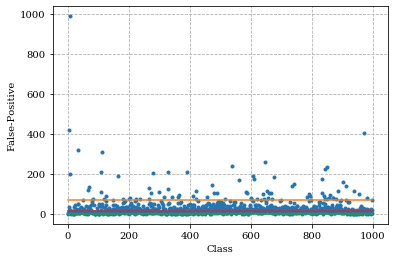

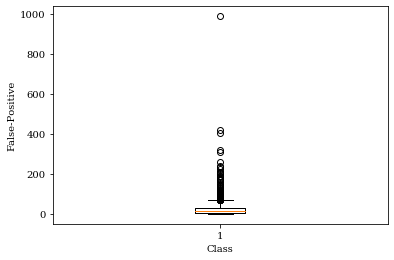

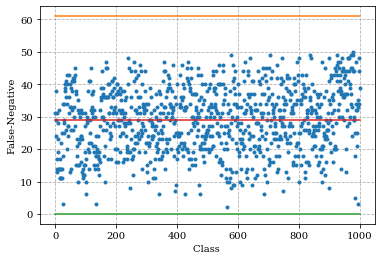

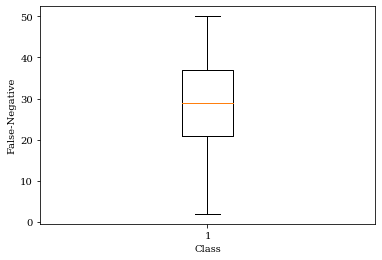

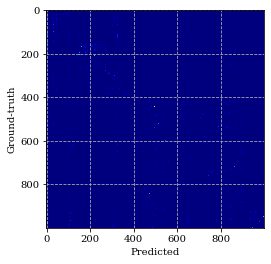

/mnt/dados/LARS_2019/__underexpose_p25_nasnet.NASNetLarge(i_cm.csv


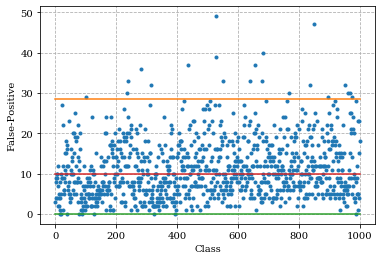

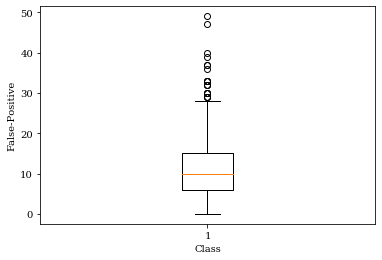

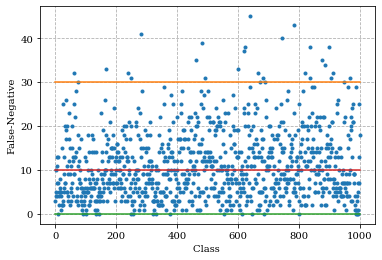

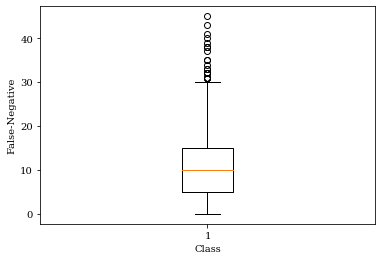

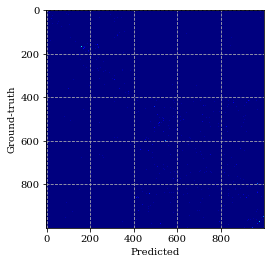

NASNetMobi
14 ['/mnt/dados/LARS_2019/___nasnet.NASNetMobi_cm.csv', '/mnt/dados/LARS_2019/__compression_nasnet.NASNetMobi_cm.csv', '/mnt/dados/LARS_2019/__gamma12_nasnet.NASNetMobi_cm.csv', '/mnt/dados/LARS_2019/__gamma14_nasnet.NASNetMobi_cm.csv', '/mnt/dados/LARS_2019/__gamma18_nasnet.NASNetMobi_cm.csv', '/mnt/dados/LARS_2019/__gamma2_nasnet.NASNetMobi_cm.csv', '/mnt/dados/LARS_2019/__gamma4_nasnet.NASNetMobi_cm.csv', '/mnt/dados/LARS_2019/__gamma8_nasnet.NASNetMobi_cm.csv', '/mnt/dados/LARS_2019/__gauss_nasnet.NASNetMobi_cm.csv', '/mnt/dados/LARS_2019/__poisson_nasnet.NASNetMobi_cm.csv', '/mnt/dados/LARS_2019/__s&p_nasnet.NASNetMobi_cm.csv', '/mnt/dados/LARS_2019/__saturate_p25_nasnet.NASNetMobile(_cm.csv', '/mnt/dados/LARS_2019/__speckle_nasnet.NASNetMobi_cm.csv', '/mnt/dados/LARS_2019/__underexpose_p25_nasnet.NASNetMobile(_cm.csv']
/mnt/dados/LARS_2019/___nasnet.NASNetMobi_cm.csv


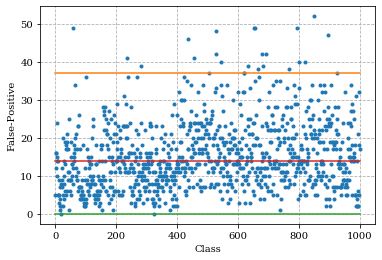

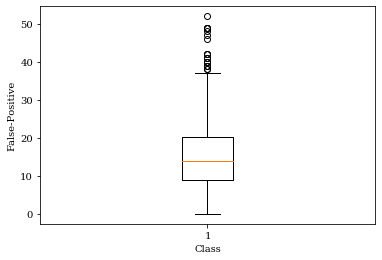

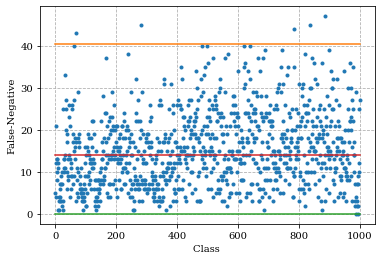

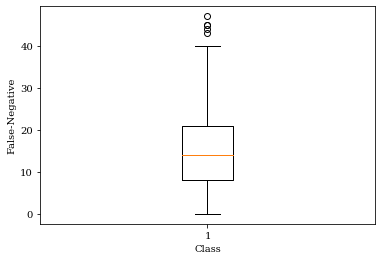

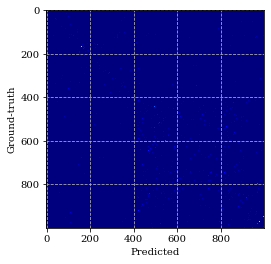

/mnt/dados/LARS_2019/__compression_nasnet.NASNetMobi_cm.csv


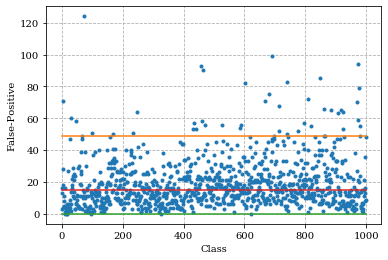

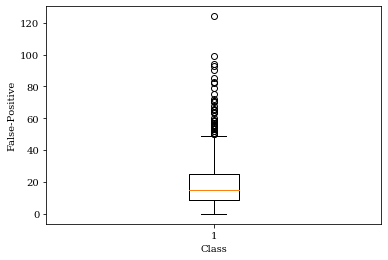

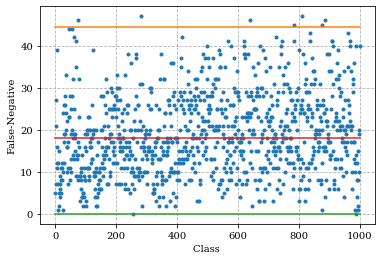

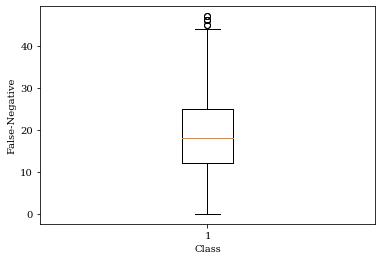

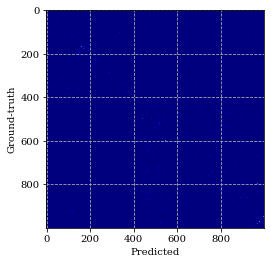

/mnt/dados/LARS_2019/__gamma12_nasnet.NASNetMobi_cm.csv


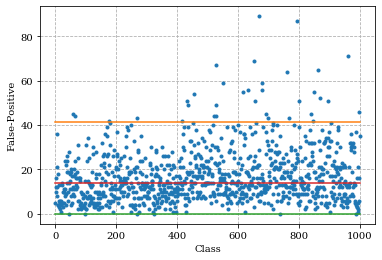

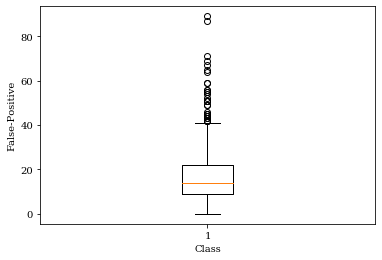

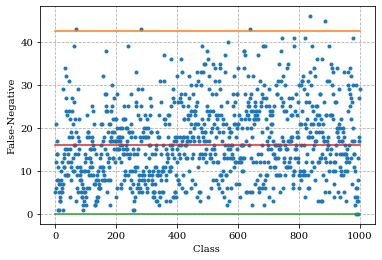

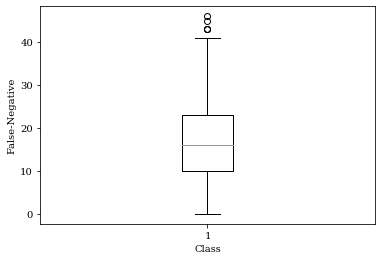

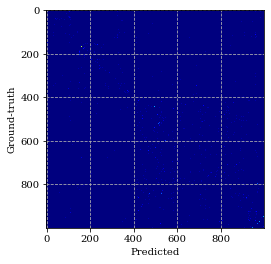

/mnt/dados/LARS_2019/__gamma14_nasnet.NASNetMobi_cm.csv


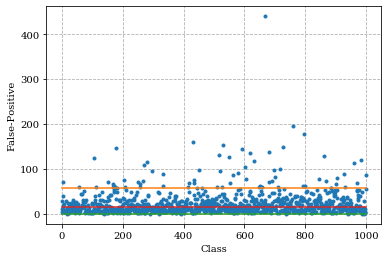

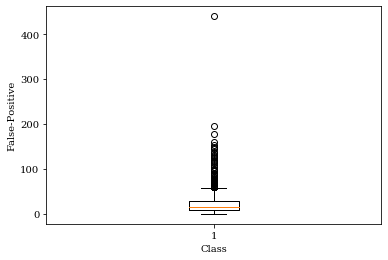

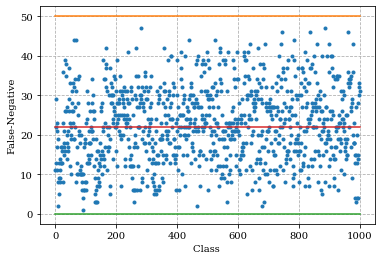

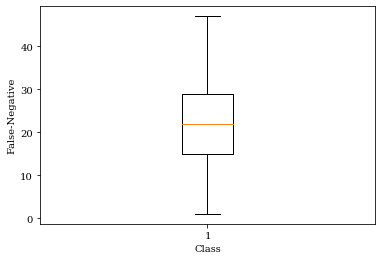

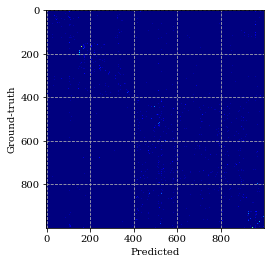

/mnt/dados/LARS_2019/__gamma18_nasnet.NASNetMobi_cm.csv


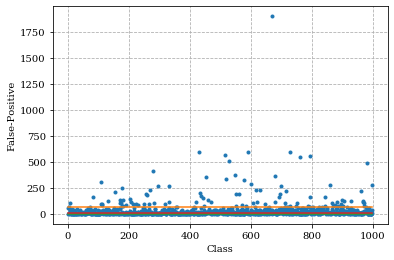

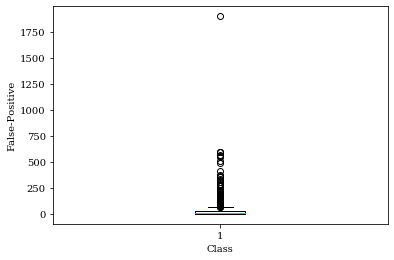

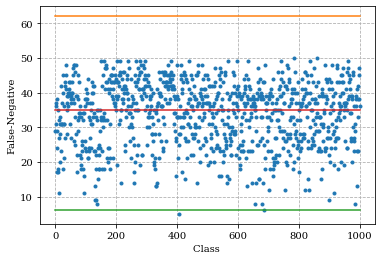

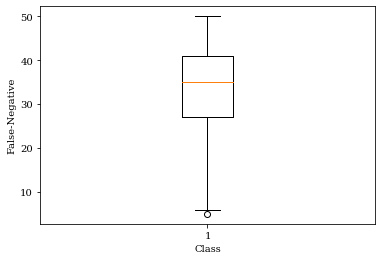

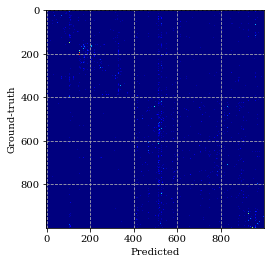

/mnt/dados/LARS_2019/__gamma2_nasnet.NASNetMobi_cm.csv


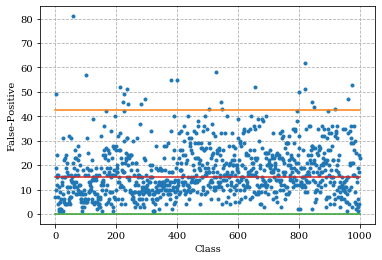

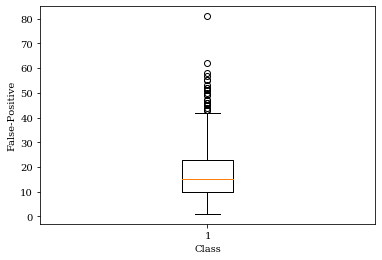

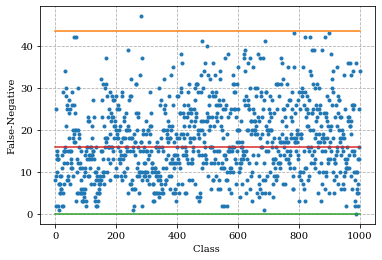

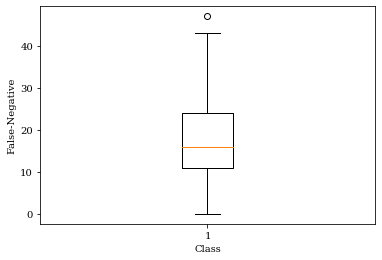

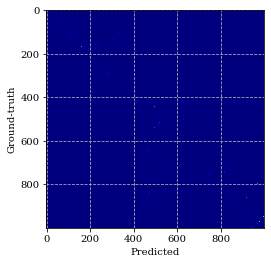

/mnt/dados/LARS_2019/__gamma4_nasnet.NASNetMobi_cm.csv


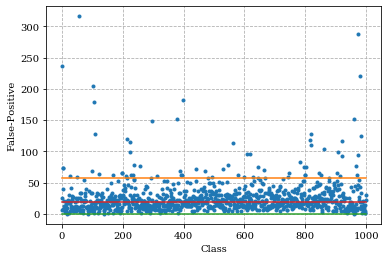

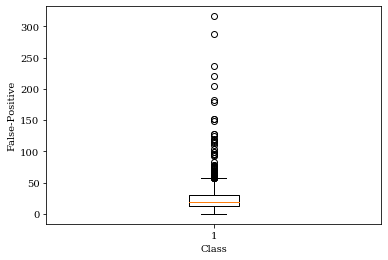

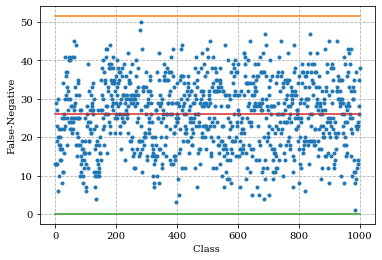

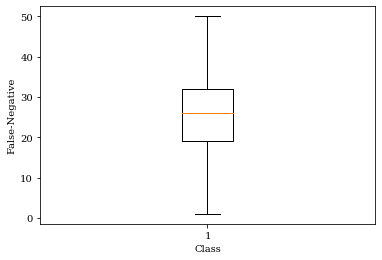

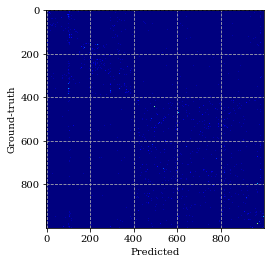

/mnt/dados/LARS_2019/__gamma8_nasnet.NASNetMobi_cm.csv


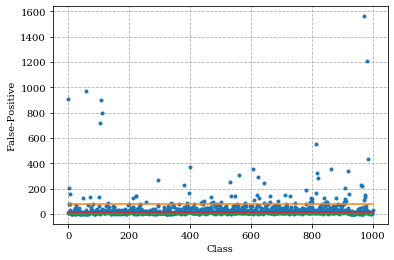

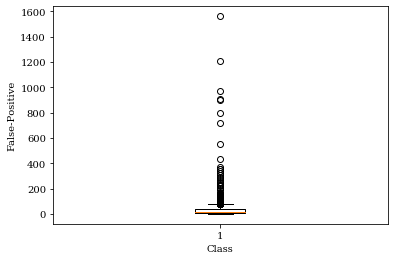

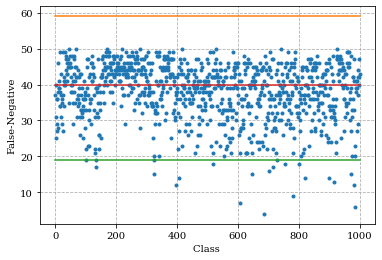

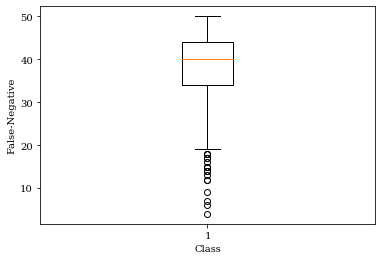

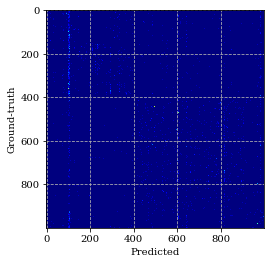

/mnt/dados/LARS_2019/__gauss_nasnet.NASNetMobi_cm.csv


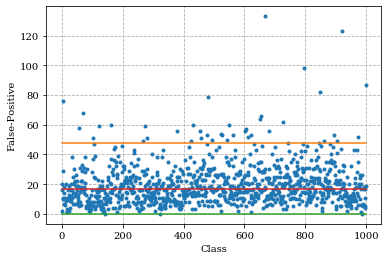

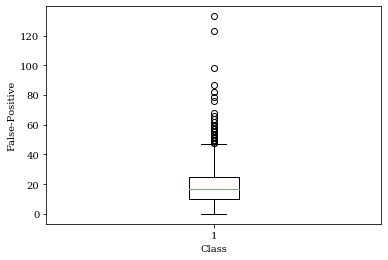

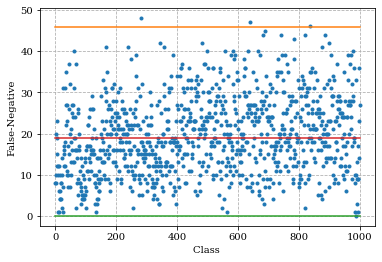

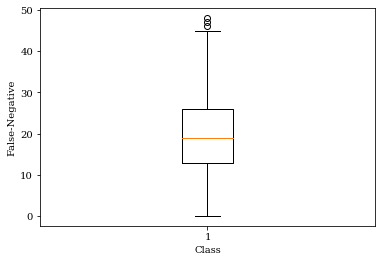

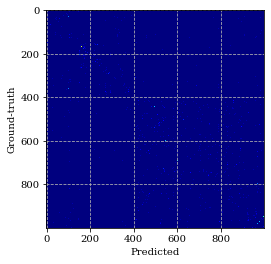

/mnt/dados/LARS_2019/__poisson_nasnet.NASNetMobi_cm.csv


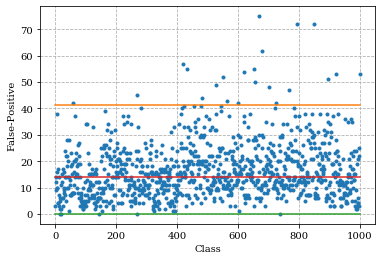

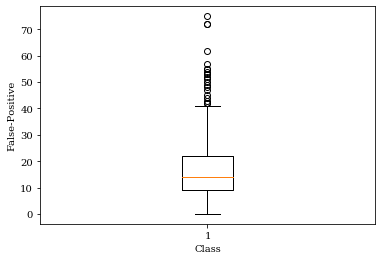

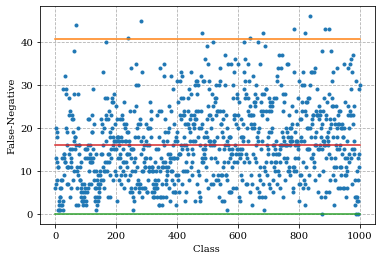

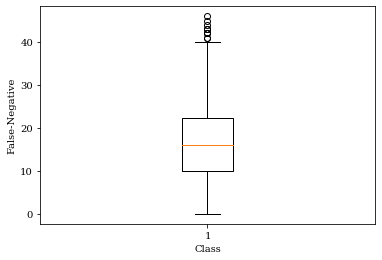

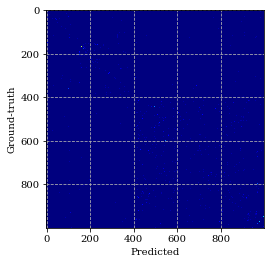

/mnt/dados/LARS_2019/__s&p_nasnet.NASNetMobi_cm.csv


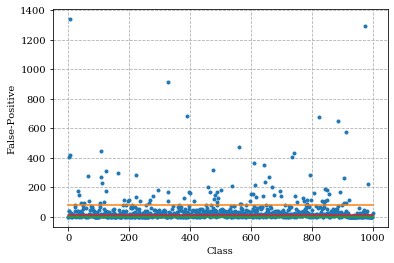

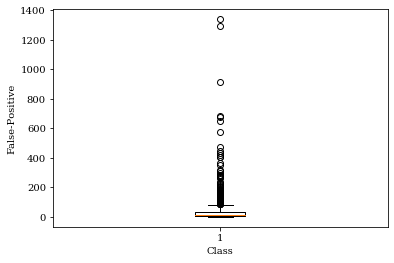

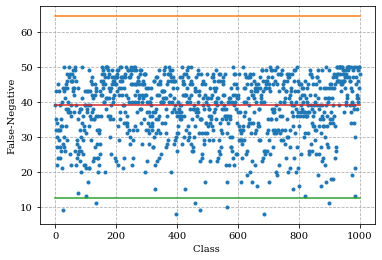

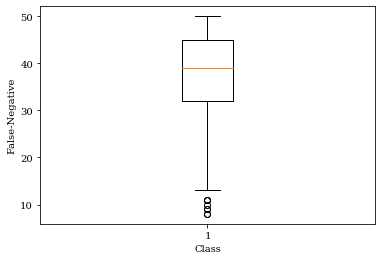

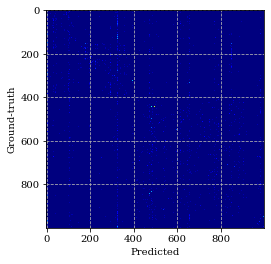

/mnt/dados/LARS_2019/__saturate_p25_nasnet.NASNetMobile(_cm.csv


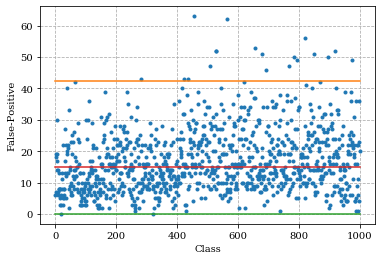

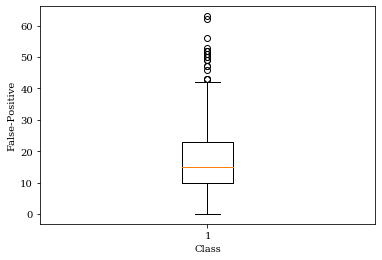

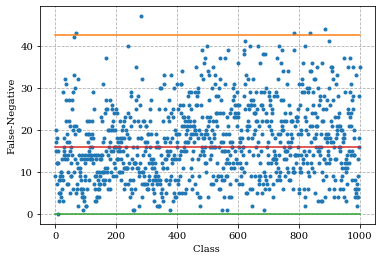

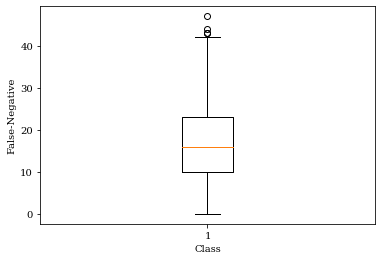

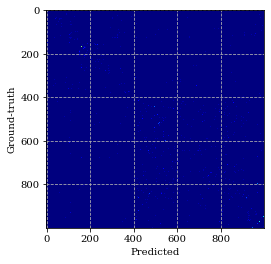

/mnt/dados/LARS_2019/__speckle_nasnet.NASNetMobi_cm.csv


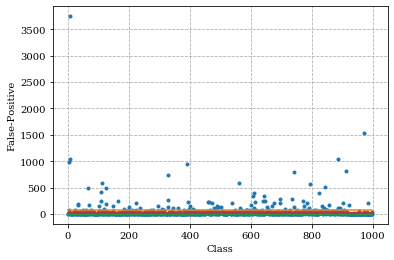

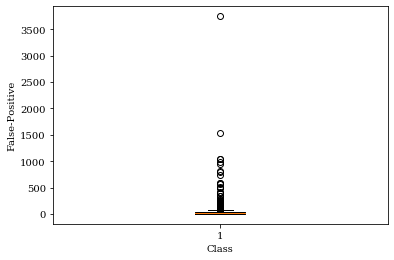

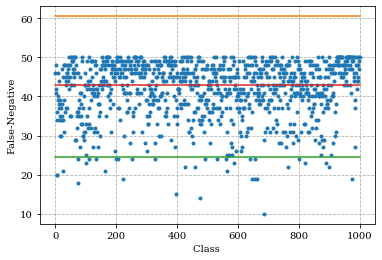

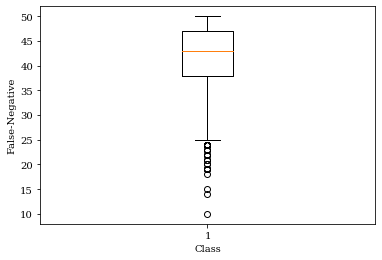

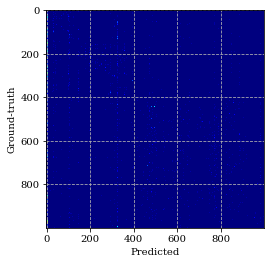

/mnt/dados/LARS_2019/__underexpose_p25_nasnet.NASNetMobile(_cm.csv


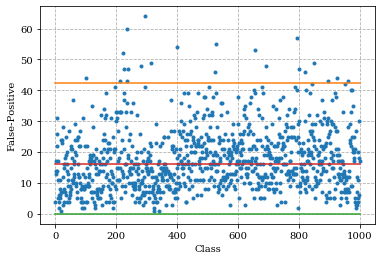

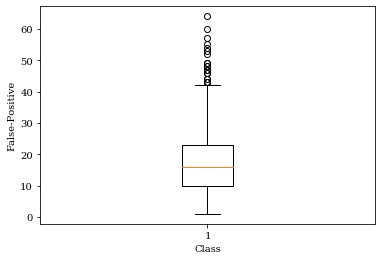

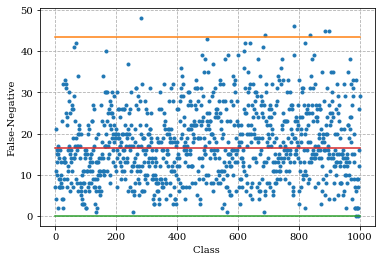

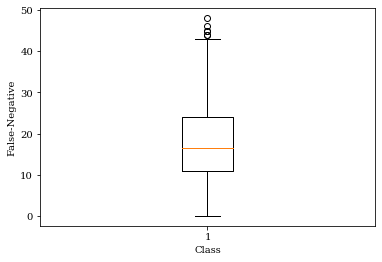

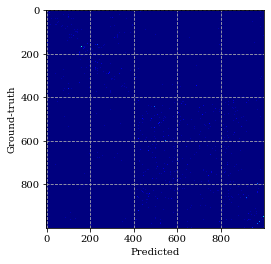

In [18]:
# plot consusion matrix as image
# sort by network model
for m in model_list:
    conditions = []
    for file in csv_list:
        if m in file:
            conditions.append(file)
    print(m)
    print(len(conditions),conditions)
    
    for c in conditions:
        print(c)
        plot_file_name = os.path.basename(c).replace(".", "_").replace("(","_")[:-4]
        dt = pd.read_csv(c,header=None)
#         print(np.sum(dt.values[:,1:],axis=1).flatten())
        only_false = dt.values[:,1:]
        only_false = only_false - (dt.values[:,1:]*np.identity(1000))
        
        # false positive
        fp = np.sum(only_false,axis=0).flatten()
        q2 = np.percentile(fp,50); q1 = np.percentile(fp,25); q3 = np.percentile(fp,75); iqr = q3 - q1 
        lt = np.max([0,(q1 - 1.5 * iqr)]); ht = (q3 + 1.5 * iqr)
        plt.figure();plt.xlabel('Class');plt.ylabel('False-Positive');plt.grid(True,linestyle='--')
        plt.plot(fp,'.')
        plt.plot(np.ones(1000)*ht, label='Upper');plt.plot(np.ones(1000)*lt, label='Lower');plt.plot(np.ones(1000)*q2, label='Median')
        plt.savefig(os.path.join(FIGURE_FOLDER, plot_file_name+"_fp.jpg"), dpi = 300, bbox_inches='tight')
        
        plt.figure();plt.xlabel('Class');plt.ylabel('False-Positive');
        plt.boxplot(fp)
        plt.savefig(os.path.join(FIGURE_FOLDER, plot_file_name+"_fp_bb.jpg"), dpi = 300, bbox_inches='tight')
        
        # false negative
        fn = np.sum(only_false,axis=1).flatten()
        q2 = np.percentile(fn,50); q1 = np.percentile(fn,25); q3 = np.percentile(fn,75); iqr = q3 - q1 
        lt = np.max([0,(q1 - 1.5 * iqr)]); ht = (q3 + 1.5 * iqr)
        plt.figure();plt.xlabel('Class ');plt.ylabel('False-Negative');plt.grid(True,linestyle='--')
        plt.plot(fn,'.')
        plt.plot(np.ones(1000)*ht, label='Upper');plt.plot(np.ones(1000)*lt, label='Lower');plt.plot(np.ones(1000)*q2, label='Median')
        plt.savefig(os.path.join(FIGURE_FOLDER, plot_file_name+"_fn.jpg"), dpi = 300, bbox_inches='tight')
        
        plt.figure();plt.xlabel('Class');plt.ylabel('False-Negative');
        plt.boxplot(fn)
        plt.savefig(os.path.join(FIGURE_FOLDER, plot_file_name+"_fn_bb.jpg"), dpi = 300, bbox_inches='tight')
        
#         print(np.sum(only_false,axis=0).flatten())
        
#         only_false = np.log2(only_false)
        plt.figure();plt.xlabel('Predicted');plt.ylabel('Ground-truth');plt.imshow(only_false, cmap='jet');plt.grid(True,linestyle='--')
#         plt.figure();plt.imshow(only_false, cmap='YlOrRd')
#         plt.figure();plt.imshow(only_false, cmap='PuRd', interpolation='nearest')
        plt.savefig(os.path.join(FIGURE_FOLDER, plot_file_name+".jpg"), dpi = 300, bbox_inches='tight')
        plt.show()

In [7]:
# identify top false positives and negatives

for m in model_list:
    conditions = []
    for file in csv_list:
        if m in file:
            conditions.append(file)
    print(m)
    print(len(conditions),conditions)
    
    for c in conditions:
        print(c)
        dt = pd.read_csv(c,header=None)
        only_false = dt.values[:,1:]
        only_false = only_false - (dt.values[:,1:]*np.identity(1000))
        fp = (np.sum(only_false,axis=0)).argsort()[:5]
        print('fp ', fp)
#         print("fp ",decode_predictions(np.expand_dims(np.sum(only_false,axis=0),axis=0)))
        fn = (-np.sum(only_false,axis=1)).argsort()[:5]
        print('fn ',fn)
#         print("fn ",decode_predictions(np.expand_dims(-np.sum(only_false,axis=1),axis=0)))


NASNetLarg
14 ['/mnt/dados/LARS_2019/___nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__compression_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__gamma12_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__gamma14_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__gamma18_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__gamma2_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__gamma4_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__gamma8_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__gauss_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__poisson_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__s&p_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__saturate_p25_nasnet.NASNetLarge(i_cm.csv', '/mnt/dados/LARS_2019/__speckle_nasnet.NASNetLarg_cm.csv', '/mnt/dados/LARS_2019/__underexpose_p25_nasnet.NASNetLarge(i_cm.csv']
/mnt/dados/LARS_2019/___nasnet.NASNetLarg_cm.csv
fp  [247  98 323  20  38]
fn  [744 638 782 282 620]
/mnt/dados/LARS_2019/__compression_nasnet.NASNetLar

In [8]:
stats_list = glob.glob(CSV_FOLDER + "*" + STATS_EXT)
stats_list.sort()
print("Found ", len(stats_list), " files")

Found  151  files


In [9]:



for m in model_list:
    conditions = []
    for file in stats_list:
        if m in file:
            conditions.append(file)
    print(m)
    print(len(conditions),conditions)
    
    stats = []
    
    for c in conditions:
        stats.append(pd.read_csv(c,header=None)[1])
#         print(pd.read_csv(c,header=None)[1])
    stats=np.array(stats)
    stats = np.concatenate([np.array([['1Original', 'Compression','2Gamma 1/2','3Gamma 1/4','4Gamma 1/8','5Gamma 2','6Gamma 4', '7Gamma 8', 'Gaussian', 'Poisson', 'Salt and Pep.','8Saturate_p25','Speckle','9Underexpose_p25']]).T,stats],axis=1)
    stats = pd.DataFrame(stats)
    stats.rename(columns = {0:'Distortion',1:'Top-1', 2:'Top-3',3:'Top-5',4:'Recall',5:'Prec.',6:'F1-Score' }, inplace = True)
    stats = stats.sort_values(by='Distortion')

    stats.to_csv(CSV_FOLDER+'_R_'+m+'.csv')
    print(stats)
#     plt.plot(stats)
#     plt.plot(['Original', 'Gamma 1/2','Gamma 1/4','Gamma 1/8','Gamma 2','Gamma 4', 'Gamma 8'],stats)
#     plt.scatter(['Top-1', 'Top-3','Top-5','Prec.','Recall','F1-Score'],stats)
    plt.show()
    

NASNetLarg
14 ['/mnt/dados/LARS_2019/___nasnet.NASNetLarg_stats.csv', '/mnt/dados/LARS_2019/__compression_nasnet.NASNetLarg_stats.csv', '/mnt/dados/LARS_2019/__gamma12_nasnet.NASNetLarg_stats.csv', '/mnt/dados/LARS_2019/__gamma14_nasnet.NASNetLarg_stats.csv', '/mnt/dados/LARS_2019/__gamma18_nasnet.NASNetLarg_stats.csv', '/mnt/dados/LARS_2019/__gamma2_nasnet.NASNetLarg_stats.csv', '/mnt/dados/LARS_2019/__gamma4_nasnet.NASNetLarg_stats.csv', '/mnt/dados/LARS_2019/__gamma8_nasnet.NASNetLarg_stats.csv', '/mnt/dados/LARS_2019/__gauss_nasnet.NASNetLarg_stats.csv', '/mnt/dados/LARS_2019/__poisson_nasnet.NASNetLarg_stats.csv', '/mnt/dados/LARS_2019/__s&p_nasnet.NASNetLarg_stats.csv', '/mnt/dados/LARS_2019/__saturate_p25_nasnet.NASNetLarge(i_stats.csv', '/mnt/dados/LARS_2019/__speckle_nasnet.NASNetLarg_stats.csv', '/mnt/dados/LARS_2019/__underexpose_p25_nasnet.NASNetLarge(i_stats.csv']
          Distortion               Top-1               Top-3  \
0          1Original  0.8062599897384644  0.92

In [10]:
import cv2
from skimage.io import imread, imsave
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure
%matplotlib inline

#escuro
def gamma8(img):
    return exposure.adjust_gamma(img, 8.)
def gamma4(img):
    return exposure.adjust_gamma(img, 4.)
def gamma2(img):
    return exposure.adjust_gamma(img, 2.)
#claro
def gamma18(img):
    return exposure.adjust_gamma(img, 1./8.)
def gamma14(img):
    return exposure.adjust_gamma(img, 1./4.)
def gamma12(img):
    return exposure.adjust_gamma(img, 1./2.)

#
def saturate(rgb, threshold = [0, .6]):
    rgb_clipped = np.clip(rgb, threshold[0], threshold[1])
    rgb_clipped = rgb_clipped- np.min(rgb_clipped)
    rgb_clipped = rgb_clipped/np.max(rgb_clipped)
    rgb_clipped = np.clip(rgb_clipped, .0, 1.)
    return (rgb_clipped*255).astype(np.uint8)

def underexpose_p25(img_A):
    return saturate(img_A,[np.percentile(img_A,25),255.])

def saturate_p25(img_A):
    return saturate(img_A,[0.,np.percentile(img_A,75)])

def compression(rgb, ftype='.jpg', quality=15):
    encode_param = [int(cv2.IMWRITE_JPEG_QUALITY), quality]
    result, encimg = cv2.imencode(ftype, rgb, encode_param)
    decimg = cv2.imdecode(encimg, 1)
    return decimg

def add_noise(image, noise_typ = "gauss", mean = 0, var = 555, exp_sigma = 0.5, percent = 1):
    
    if noise_typ == "gauss":
        row,col,ch= image.shape
        #mean = 0
        #var = 0.1
        sigma = ((percent**2)*var)**exp_sigma
        gauss = np.random.normal(mean,sigma,(row,col,ch))
        gauss = gauss.reshape(row,col,ch)
        noisy = image + gauss
        noisy = np.clip(noisy, .0, 255.)
        return noisy
    
    elif noise_typ == "s&p":
        row,col,ch = image.shape
        s_vs_p = 0.5
        amount = 0.3
        out = np.copy(image)
        # Salt mode
        num_salt = np.ceil(amount * image.size * s_vs_p)
        coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
        out[coords] = 1

        # Pepper mode
        num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
        coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
        out[coords] = 0
        out = np.clip(out, .0, 255.)
        return out
    
    elif noise_typ == "poisson":
        vals = len(np.unique(image))
        vals = 2 ** np.ceil(np.log2(vals))
        noisy = np.random.poisson(image/255. * vals) / float(vals)
        noisy = np.clip(noisy*255., .0, 255.)
        return noisy
    
    elif noise_typ =="speckle":
        row,col,ch = image.shape
        gauss = np.random.randn(row,col,ch)
        gauss = gauss.reshape(row,col,ch)        
        noisy = image + image * gauss
        noisy = np.clip(noisy, .0, 255.)
        return noisy
    elif noise_typ == "glare":
        print('Not yet implemented')

Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
/home/nautec/.local/lib/python3.6/site-packages/ipykernel_launcher.py:65: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/nautec/.local/lib/python3.6/site-packages/ipykernel_launcher.py:71: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
Lossy conversion from float64 to uint8. Range [0.0, 255.0]

CPU times: user 2.98 s, sys: 196 ms, total: 3.18 s
Wall time: 3.25 s


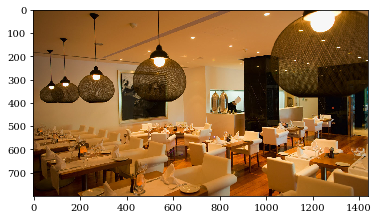

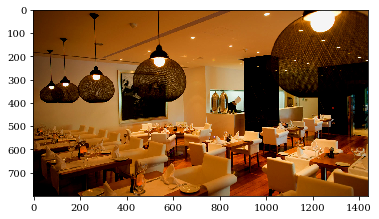

In [11]:
%%time

# img = imread('/mnt/dados/imagenet/ILSVRC2012_img_val/n07749582/ILSVRC2012_val_00017982.JPEG')
img = imread('/mnt/dados/imagenet/ILSVRC2012_img_val/n04081281/ILSVRC2012_val_00038151.JPEG')

plt.imshow(img)
plt.figure()
plt.imshow(underexpose_p25(img))
# os.makedirs('/mnt/dados/img_lars/')
os.chdir('/mnt/dados/img_lars/')
imsave('original.jpg',img)
imsave('gamma8.jpg',gamma8(img))
imsave('gamma4.jpg',gamma4(img))
imsave('gamma2.jpg',gamma2(img))
imsave('gamma18.jpg',gamma18(img))
imsave('gamma14.jpg',gamma14(img))
imsave('gamma12.jpg',gamma12(img))
imsave('underexpose_p25.jpg',underexpose_p25(img))
imsave('saturate_p25.jpg',saturate_p25(img))
imsave('compression.jpg',compression(img, quality= 15))
imsave('speckle.jpg',add_noise(img, 'speckle'))
imsave('poisson.jpg',add_noise(img, 'poisson'))
imsave('snp.jpg',add_noise(img, 's&p'))
imsave('gauss.jpg',add_noise(img, 'gauss'))